# Домашня робота №8

# Перетворення випадкових величин та векторів

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Експоненційний розподіл

### 1.1 Завдання 1.1

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного експоненційного розподілу.
Тобто $\xi_1, \xi_2 \sim Exp(1)$.

Який розподіл має випадкова величина $\displaystyle \eta = \frac{\xi_1}{\xi_1 + \xi_2}$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\eta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\eta$.

**Зауваження.** Передбачається використання теореми про обрахунок щільності функції від випадкової величини (через якобіан оберненого відображення).

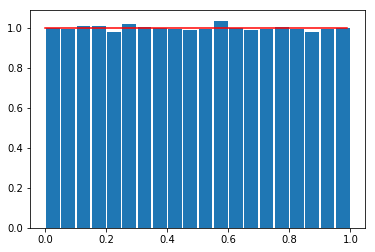

In [10]:
# Місце для Вашого коду

from scipy.stats import expon
from scipy.special import gammainc

rv1 = expon(0, 1)
rv2 = expon(0, 1)

random1 = rv1.rvs(100_000)
random2 = rv2.rvs(100_000)

res_random = random1 / (random1 + random2)
x = np.arange(0, 1, 0.01)

plt.hist(res_random, bins=20, density=True, rwidth=0.9)
plt.plot(x, gammainc(0, np.sqrt(x)), 'r')        # density = Г(0, sqrt(x)) = 1 for real x
plt.show()

### 1.2 Завдання 1.2

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного експоненційного розподілу.
Тобто $\xi_1, \xi_2 \sim Exp(1)$.

Який розподіл має випадкова величина $\eta = \xi_1 + \xi_2$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\eta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\eta$.

**Зауваження.** Передбачається використання теореми про обрахунок щільності суми двох незалежних випадкових величин (через згортку щільностей).

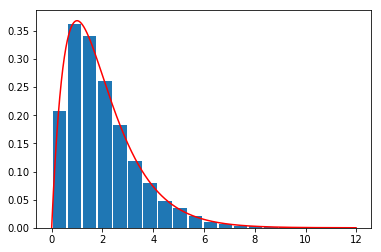

In [13]:
# Місце для Вашого коду

random1 = rv1.rvs(10_000)
random2 = rv2.rvs(10_000)

res_random = random1 + random2

x = np.arange(0, 12, 0.01)
plt.hist(res_random, bins=20, rwidth=0.9, density=True)
plt.plot(x, x * np.exp(-x), 'r')
plt.show()


## 2 Нормальний розподіл

### 2.1 Завдання 2.1

Розглянемо три незалежні випадкові величини $\xi_1, \xi_2, \theta$ такі,
що $\xi_1, \xi_2 \sim N(0, 1), \theta \sim Uniform(0, 2 \pi)$.

Який розподіл має випадкова величина $\displaystyle \zeta = \xi_1 \cos \theta + \xi_2 \sin \theta$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2, \theta$;
2. Отримайте $n = 10000$ значень випадкової величини $\zeta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\zeta$;
   - функцію щільності випадкової величини $\zeta$.

**Зауваження.** Передбачається використання теореми про лінійне перетворення нормальних величин.

Let there is a random value $\xi = \begin{pmatrix} \xi_1 \\ \xi_2 \end{pmatrix}\sim N_2(0, 1)$

Let there is a linear transformation 
$$A = \begin{pmatrix} \cos{\theta} & \sin{\theta} \\
                  -\sin{\theta} & \cos{\theta} 
  \end{pmatrix}$$
 
A is ortogonal, thus by the theorem of linear transformation of random value with standard normal distribution:

$$A \xi  = \begin{pmatrix} \xi_1\cos{\theta} + \xi_2\sin{\theta} \\
                           \xi_1\cos{\theta} - \xi_2\sin{\theta} \end{pmatrix}  \sim N_2 (0, 1)$$

Thus, 
$$f_{A \xi} (x, y) = \frac{1}{2\pi} e^{-\frac{(x^2 + y^2)}{2}}$$
$$f_{\varsigma} (x) = \int_{-\infty}^{\infty}\frac{1}{2\pi} e^{-\frac{x^2 + y^2}{2}}dy = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$

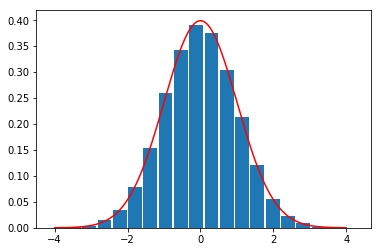

In [21]:
# Місце для Вашого коду

from scipy.stats import norm, uniform

rv1 = norm()
rv2 = norm()
theta = uniform(0, 2 * np.pi)

x = np.arange(-4, 4, 0.01)
random1 = rv1.rvs(100_000)
random2 = rv2.rvs(100_000)
random3 = theta.rvs(100_000)

res_random = random1 * np.cos(random3) + random2 * np.sin(random3)
plt.hist(res_random, bins=20, rwidth=0.9, density=True)
plt.plot(x, rv1.pdf(x), 'r')
plt.show()

### 2.2 Завдання 2.2

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного нормального розподілу.
Тобто $\xi_1, \xi_2 \sim N(0, 1)$.

Які розподіли (щільності) мають випадкові величини $\displaystyle \zeta = \sqrt{\xi_1^2 + \xi_2^2}, \eta = \arccos \frac{\xi_1}{\zeta}$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\zeta$;
3. Отримайте $n = 10000$ значень випадкової величини $\eta$;
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\zeta$;
   - функцію щільності випадкової величини $\zeta$;
5. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\eta$.

**Зауваження 1.** Передбачається використання теореми про обрахунок щільності функції від випадкової величини (через якобіан оберненого відображення).

**Зауваження 2.** Насправді, розподіл отриманих значень випадкової величини $\eta$ буде трохи відрізнятися від порахованого теоретично (будуть інші параметри).
Так виходить за рахунок реалізації функції $\arccos$ (її області значень).

In [5]:
# Місце для Вашого коду



## 3 Рівномірний розподіл

### 3.1 Завдання 3.1

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ з рівномірного розподілу на $[-1, 1]$.
Тобто $\xi_1, \xi_2 \sim Uniform(-1, 1)$.

Який розподіл має випадкова величина $\eta = \xi_1 + \xi_2$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\eta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\eta$.

**Зауваження.** Передбачається використання теореми про обрахунок щільності суми двох незалежних випадкових величин (через згортку щільностей).

In [6]:
# Місце для Вашого коду

